#Transliterated to Malyalam

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import seaborn as sns
from sklearn import metrics
from sklearn.metrics import classification_report

In [14]:
df1 = pd.read_csv("Malyalam.csv")
df2=pd.read_csv("Malyalam_test.csv")

In [16]:
label_mapping = {"Non-sarcastic": 0, "Sarcastic": 1}
df1['map'] = df1['labels'].map(label_mapping)
df2['map'] = df2['labels'].map(label_mapping)

In [17]:
!nvidia-smi -L

GPU 0: Tesla T4 (UUID: GPU-2a5266ef-904b-79c5-7e02-7a36fe57ebf8)


In [18]:
df1

,,Text,labels,malyalam_text,mtext,map
0,0,ആദ്യം കേട്ടിട്ട് ഇഷ്ടായില്ല ഇപ്പൊ വീണ്ടും വീ...,Non-sarcastic,{'ml': 'ആദ്യം കേട്ടിട്ട് ഇഷ്ടായില്ല ഇപ്പൊ വീണ...,ആദ്യം കേട്ടിട്ട് ഇഷ്ടായില്ല ഇപ്പൊ വീണ്ടും വീ...,0
1,1,1:07 . ezhuthi kaanichathu kondu aaranennu man...,Non-sarcastic,{'ml': '൧:൦൭ . എഴുതി കാണിച്ചത് കൊണ്ട് ആരാണെന്ന...,൧:൦൭ . എഴുതി കാണിച്ചത് കൊണ്ട് ആരാണെന്ന് മനസിലായി,0
2,2,"Uyyantaa moneee, ikkaa uyyyrrr",Sarcastic,"{'ml': 'ഉയ്യന്റാ മോണി, ഇക്കാ ഉയ്യർർ'}","ഉയ്യന്റാ മോണി, ഇക്കാ ഉയ്യർർ",1
3,3,K J Yesudas fans like here,Non-sarcastic,{'ml': 'കെ ജെ യേശുദാസ് ഫാൻസ് ലൈക്ക് ഹെയർ'},കെ ജെ യേശുദാസ് ഫാൻസ് ലൈക്ക് ഹെയർ,0
4,4,Bollywood moviyude oru feel തോന്നിയവർ ലൈക് അടി...,Non-sarcastic,{'ml': 'ബോളിവുഡ് മൂവിയുടെ ഒരു ഫീൽ തോന്നിയവർ ലൈ...,ബോളിവുഡ് മൂവിയുടെ ഒരു ഫീൽ തോന്നിയവർ ലൈക് അടിക്ക്,0
...,...,...,...,...,...,...
12052,12052,Ente UDUTHUNI kandillaaa...'nne parayunnathaar...,Sarcastic,"{'ml': ""എന്റെ ഉടുതുണി കണ്ടില്ലാ...'ന്നെ പറയുന്...",എന്റെ ഉടുതുണി കണ്ടില്ലാ...'ന്നെ പറയുന്നതാരുന്ന...,1
12053,12053,ഈ മൂന്ന് അക്ഷരം മതി ദിലീപ് സിനിമ വേറെ ലെവൽ ആകു...,Sarcastic,{'ml': 'ഈ മൂന്ന് അക്ഷരം മതി ദിലീപ് സിനിമ വേറെ ...,ഈ മൂന്ന് അക്ഷരം മതി ദിലീപ് സിനിമ വേറെ ലെവൽ ആകു...,1
12054,12054,Class kazhinju makkalee Ini ikkade mass kanam,Non-sarcastic,{'ml': 'ക്ലാസ് കഴിഞ്ഞു മക്കളേ ഇനി ഇക്കടെ മാസ് ...,ക്ലാസ് കഴിഞ്ഞു മക്കളേ ഇനി ഇക്കടെ മാസ് കനം,0
12055,12055,I like madhura Raja trailer.so I make a versio...,Non-sarcastic,{'ml': 'ഇ ലൈക്ക് മധുര രാജ ട്രെയിലർ.സോ ഇ മേക്ക്...,ഇ ലൈക്ക് മധുര രാജ ട്രെയിലർ.സോ ഇ മേക്ക് അ വേർഷൻ...,0


In [19]:
df2

,Text,labels,malyalam_text,mtext,map
0,നീയൊക്കെ ആരാധിച്ചു ആരാധിച്ചു വളർത്തിയിട്ടല്ല ഞ...,Non-sarcastic,{'ml': 'നീയൊക്കെ ആരാധിച്ചു ആരാധിച്ചു വളർത്തിയി...,നീയൊക്കെ ആരാധിച്ചു ആരാധിച്ചു വളർത്തിയിട്ടല്ല ഞ...,0
1,ശ്ശെ ...!! അനു ചേച്ചി വിത്ത് മുലക്കച്ച പ്രതീക്...,Sarcastic,{'ml': 'ശ്ശെ ...!! അനു ചേച്ചി വിത്ത് മുലക്കച്ച...,ശ്ശെ ...!! അനു ചേച്ചി വിത്ത് മുലക്കച്ച പ്രതീക്...,1
2,Jaison um keerthiyum super aanu .....aaa chir...,Non-sarcastic,{'ml': 'ജെയ്സൺ ഉം കീർത്തിയും സൂപ്പർ ആണ് ........,ജെയ്സൺ ഉം കീർത്തിയും സൂപ്പർ ആണ് .....ആ ചിരി പ...,0
3,1M+ VIEWS IN 19 Hrs 2M+ VIEWS IN 4 DAYS,Non-sarcastic,{'ml': '൧എം+ വ്യൂസ് ഇൻ ൧൯ ഹർസ് ൨എം+ വ്യൂസ് ഇൻ ...,൧എം+ വ്യൂസ് ഇൻ ൧൯ ഹർസ് ൨എം+ വ്യൂസ് ഇൻ ൪ ഡേയ്സ്,0
4,"addict ആവാനുള്ളതൊന്നും ഇല്ല ഇതിൽ..... dailly, ...",Non-sarcastic,{'ml': 'അഡിക്ട് ആവാനുള്ളതൊന്നും ഇല്ല ഇതിൽ........,"അഡിക്ട് ആവാനുള്ളതൊന്നും ഇല്ല ഇതിൽ..... ഡെയ്ലി,...",0
...,...,...,...,...,...
3010,Entammoooo lalettan clean shave look maarakam ...,Non-sarcastic,{'ml': 'എന്റമ്മൂഓ ലാലേട്ടൻ ക്ലീൻ ഷേവ് ലുക്ക് മ...,എന്റമ്മൂഓ ലാലേട്ടൻ ക്ലീൻ ഷേവ് ലുക്ക് മാരകം കട്...,0
3011,Shane ninnodu abhinayikkana paranje allathe je...,Non-sarcastic,{'ml': 'ഷെയ്ൻ നിന്നോട് അഭിനയിക്കണ പറഞ്ഞേ അല്ലാ...,ഷെയ്ൻ നിന്നോട് അഭിനയിക്കണ പറഞ്ഞേ അല്ലാതെ ജീവിക...,0
3012,yenthu chali annu bro ethu,Non-sarcastic,{'ml': 'എന്തു ചാലി അന്നു ബ്രോ എത്തു'},എന്തു ചാലി അന്നു ബ്രോ എത്തു,0
3013,Trailer polichu.... Ee trailerilum valutaanu c...,Non-sarcastic,{'ml': 'ട്രെയിലർ പൊളിച്ചു.... ഇഇ ട്രെയിലറിലും ...,ട്രെയിലർ പൊളിച്ചു.... ഇഇ ട്രെയിലറിലും വലുട്ടാണ...,0


### ML Model

In [99]:
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
cntv=CountVectorizer()
tfidf=TfidfVectorizer()

In [100]:
X_train=tfidf.fit_transform(df1['mtext']).toarray()
Y_train=df1.iloc[:,5].values

In [101]:
X_test=tfidf.transform(df2['mtext']).toarray()
Y_test=df2.iloc[:,4].values

In [102]:
len(X_train), len(Y_train), len(X_test), len(Y_test)

(12057, 12057, 3015, 3015)

In [103]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(random_state=4)

In [104]:
rfc.fit(X_train,Y_train)

RandomForestClassifier(random_state=4)

In [105]:
y_predt_1=rfc.predict(X_test)

In [106]:
print("Random_Forest")
print(classification_report(Y_test, y_predt_1))

Random_Forest
              precision    recall  f1-score   support

           0       0.83      0.98      0.90      2427
           1       0.69      0.15      0.25       588

    accuracy                           0.82      3015
   macro avg       0.76      0.57      0.58      3015
weighted avg       0.80      0.82      0.77      3015



In [107]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()

In [108]:
lr.fit(X_train,Y_train)

LogisticRegression()

In [109]:
y_predt_2=lr.predict(X_test)

In [110]:
print("Logistic Regression")
print(classification_report(Y_test, y_predt_2))

Logistic Regression
              precision    recall  f1-score   support

           0       0.83      0.98      0.90      2427
           1       0.73      0.20      0.31       588

    accuracy                           0.83      3015
   macro avg       0.78      0.59      0.61      3015
weighted avg       0.82      0.83      0.79      3015



[[2386   41]
 [ 497   91]]


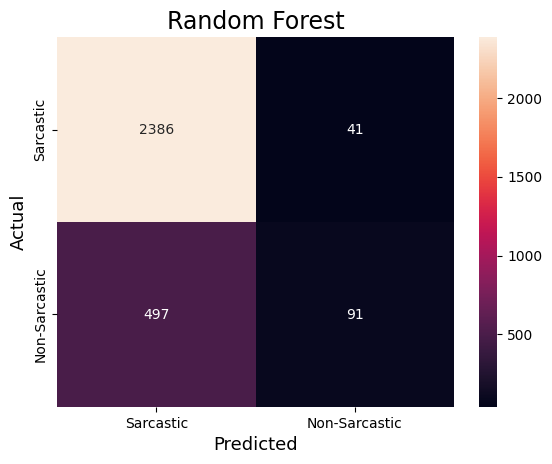

[[2385   42]
 [ 472  116]]


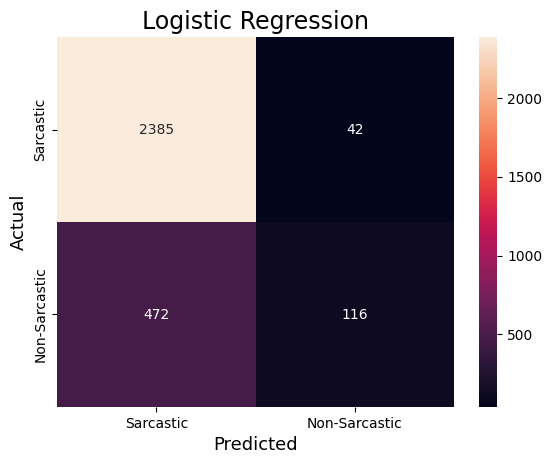

In [111]:
cm1=confusion_matrix(Y_test,y_predt_1)
cm2=confusion_matrix(Y_test,y_predt_2)

print(cm1);
sns.heatmap(cm1,
            annot=True,
            fmt='g',
            xticklabels=['Sarcastic','Non-Sarcastic'],
            yticklabels=['Sarcastic','Non-Sarcastic'])
plt.ylabel('Actual',fontsize=13)
plt.xlabel('Predicted',fontsize=13)
plt.title('Random Forest',fontsize=17)
plt.show()

print(cm2)
sns.heatmap(cm2,
            annot=True,
            fmt='g',
            xticklabels=['Sarcastic','Non-Sarcastic'],
            yticklabels=['Sarcastic','Non-Sarcastic'])
plt.ylabel('Actual',fontsize=13)
plt.xlabel('Predicted',fontsize=13)
plt.title('Logistic Regression',fontsize=17)
plt.show()

###CNN

In [20]:
import tensorflow as tf
from tensorflow.keras.layers.experimental.preprocessing import TextVectorization

In [21]:
text_vectorizer = TextVectorization(max_tokens=None, # how many words in the vocabulary (all of the different words in your text)
                                    standardize="lower_and_strip_punctuation", # how to process text
                                    split="whitespace", # how to split tokens
                                    ngrams=None, # create groups of n-words?
                                    output_mode="int", # how to map tokens to numbers
                                    output_sequence_length=None) # how long should the output sequence of tokens be?
                                    # pad_to_max_tokens=True) # Not valid if using max_tokens=None

In [22]:
X_train=df1['mtext'].values


In [23]:
X_train

array(['ആദ്യം കേട്ടിട്ട് ഇഷ്ടായില്ല  ഇപ്പൊ വീണ്ടും  വീണ്ടും റിപ്പീറ്റ്',
       '൧:൦൭ . എഴുതി കാണിച്ചത് കൊണ്ട് ആരാണെന്ന് മനസിലായി',
       'ഉയ്യന്റാ മോണി,   ഇക്കാ ഉയ്യർർ', ...,
       'ക്ലാസ് കഴിഞ്ഞു മക്കളേ ഇനി ഇക്കടെ മാസ് കനം',
       'ഇ ലൈക്ക് മധുര രാജ ട്രെയിലർ.സോ ഇ മേക്ക് അ വേർഷൻ ഓഫ് ലയണൽ മെസ്സി യൂസിങ് മധുര രാജ ട്രെയിലർ',
       'അവളുടെ മോന്തയ്ക്കിട്ടു ഒരെണ്ണം പൊട്ടിച്ചിട്ടു കണ്ണാടി എടുത്തു കാണിച്ചു കൊടുക്ക് , അപ്പൊ കാണാം അവളുടെ മൂക്കുത്തി ..'],
      dtype=object)

In [24]:
Y_train=df1.iloc[:,5].values

In [25]:
Y_train

array([0, 0, 1, ..., 0, 0, 1])

In [26]:
X_test=df2['mtext'].values

In [27]:
Y_test=df2.iloc[:,4].values

In [28]:
Y_test

array([0, 1, 0, ..., 0, 0, 1])

In [29]:
round(sum([len(i.split()) for i in X_train])/len(X_train))

10

In [30]:
# Setup text vectorization with custom variables
max_vocab_length = 10000 # max number of words to have in our vocabulary
max_length = 10 # max length our sequences will be (e.g. how many words from a Tweet does our model see?)

text_vectorizer = TextVectorization(max_tokens=max_vocab_length,
                                    output_mode="int",
                                    output_sequence_length=max_length)

In [31]:
text_vectorizer.adapt(X_train)

In [32]:
sample_sentence = "നീയൊക്കെ ആരാധിച്ചു ആരാധിച്ചു വളർത്തിയിട്ടല്ല ഞാൻ നടനായത്"
text_vectorizer([sample_sentence])

<tf.Tensor: shape=(1, 10), dtype=int64, numpy=array([[1704, 2139, 2139, 6228,   14, 7429,    0,    0,    0,    0]])>

In [33]:
tf.random.set_seed(42)
from tensorflow.keras import layers

embedding = layers.Embedding(input_dim=max_vocab_length, # set input shape
                             output_dim=128, # set size of embedding vector
                             embeddings_initializer="uniform", # default, intialize randomly
                             input_length=max_length, # how long is each input
                             name="embedding_1")

embedding

In [34]:
# Test out the embedding, 1D convolutional and max pooling
embedding_test = embedding(text_vectorizer(["നീയൊക്കെ ആരാധിച്ചു ആരാധിച്ചു വളർത്തിയിട്ടല്ല ഞാൻ നടനായത്"])) # turn target sentence into embedding
conv_1d = layers.Conv1D(filters=32, kernel_size=5, activation="relu") # convolve over target sequence 5 words at a time
conv_1d_output = conv_1d(embedding_test) # pass embedding through 1D convolutional layer
max_pool = layers.GlobalMaxPool1D()
max_pool_output = max_pool(conv_1d_output) # get the most important

In [35]:
embedding_test.shape, conv_1d_output.shape, max_pool_output.shape

(TensorShape([1, 10, 128]), TensorShape([1, 6, 32]), TensorShape([1, 32]))

In [58]:
# Set random seed and create embedding layer (new embedding layer for each model)
tf.random.set_seed(42)
from tensorflow.keras import layers
model_1_embedding = layers.Embedding(input_dim=max_vocab_length,
                                     output_dim=128,
                                     embeddings_initializer="uniform",
                                     input_length=max_length,
                                     name="embedding_2")

# Create 1-dimensional convolutional layer to model sequences
from tensorflow.keras import layers
inputs = layers.Input(shape=(1,), dtype="string")
x = text_vectorizer(inputs)
x = model_1_embedding(x)
x = layers.Conv1D(filters=32, kernel_size=5, activation="relu")(x)
x = layers.Conv1D(filters=8, kernel_size=5, activation="relu")(x)
x = layers.GlobalMaxPool1D()(x)
x = layers.Dense(8, activation="relu")(x) # optional dense layer
outputs = layers.Dense(1, activation="sigmoid")(x)
model_1 = tf.keras.Model(inputs, outputs, name="model_1_Conv1D")

# Compile Conv1D model
model_1.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Get a summary of our 1D convolution model
model_1.summary()

Model: "model_1_Conv1D"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (Text  (None, 10)                0         
 Vectorization)                                                  
                                                                 
 embedding_2 (Embedding)     (None, 10, 128)           1280000   
                                                                 
 conv1d_10 (Conv1D)          (None, 6, 32)             20512     
                                                                 
 conv1d_11 (Conv1D)          (None, 2, 8)              1288      
                                                                 
 global_max_pooling1d_4 (Gl  (None, 8)                 0         
 obalMaxPooling1D)                                  

In [59]:
# Fit the model
model_1_history = model_1.fit(X_train,Y_train,
                              epochs=5,
                              validation_data=(X_test, Y_test))

Epoch 1/5
377/377 [==============================] - 10s 22ms/step - loss: 0.4495 - accuracy: 0.8237 - val_loss: 0.3616 - val_accuracy: 0.8574
Epoch 2/5
377/377 [==============================] - 3s 8ms/step - loss: 0.2581 - accuracy: 0.9000 - val_loss: 0.3764 - val_accuracy: 0.8514
Epoch 3/5
377/377 [==============================] - 3s 7ms/step - loss: 0.1270 - accuracy: 0.9569 - val_loss: 0.4818 - val_accuracy: 0.8342
Epoch 4/5
377/377 [==============================] - 3s 9ms/step - loss: 0.0581 - accuracy: 0.9805 - val_loss: 0.6026 - val_accuracy: 0.8352
Epoch 5/5
377/377 [==============================] - 3s 7ms/step - loss: 0.0305 - accuracy: 0.9900 - val_loss: 0.7286 - val_accuracy: 0.8295


In [60]:
model_1_pred_probs = model_1.predict(X_test)

95/95 [==============================] - 1s 4ms/step


In [61]:
model_1_preds = tf.squeeze(tf.round(model_1_pred_probs))


In [62]:
y_pred=model_1_preds.numpy()

In [63]:
y_pred=y_pred.astype(int)

In [64]:
y_pred

array([0, 0, 0, ..., 1, 0, 0])

In [65]:
Y_test

array([0, 1, 0, ..., 0, 0, 1])

In [66]:
print("CNN")
print(classification_report(Y_test, y_pred))

CNN
              precision    recall  f1-score   support

           0       0.88      0.92      0.90      2427
           1       0.58      0.46      0.51       588

    accuracy                           0.83      3015
   macro avg       0.73      0.69      0.71      3015
weighted avg       0.82      0.83      0.82      3015



[[2229  198]
 [ 316  272]]


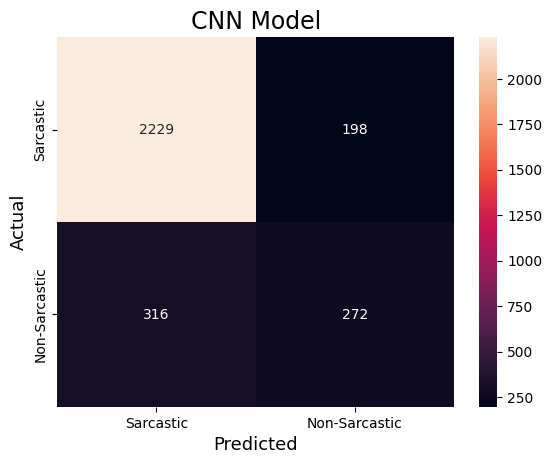

In [67]:
cm1=confusion_matrix(Y_test,y_pred)

print(cm1);
sns.heatmap(cm1,
            annot=True,
            fmt='g',
            xticklabels=['Sarcastic','Non-Sarcastic'],
            yticklabels=['Sarcastic','Non-Sarcastic'])
plt.ylabel('Actual',fontsize=13)
plt.xlabel('Predicted',fontsize=13)
plt.title('CNN Model',fontsize=17)
plt.show()

###m-bert

In [ ]:
!pip install tensorflow_text

In [6]:
import tensorflow as tf
import tensorflow_hub as hub
import tensorflow_text as text

In [7]:
bert_preprocess = hub.KerasLayer("https://tfhub.dev/tensorflow/bert_multi_cased_preprocess/3")
bert_encoder = hub.KerasLayer("https://tfhub.dev/tensorflow/bert_multi_cased_L-12_H-768_A-12/4")

In [87]:
# Bert layers
text_input = tf.keras.layers.Input(shape=(), dtype=tf.string, name='text')
preprocessed_text = bert_preprocess(text_input)
outputs = bert_encoder(preprocessed_text)

# Neural network layers
l = tf.keras.layers.Dropout(0.1, name="dropout")(outputs['pooled_output'])
l = tf.keras.layers.Dense(1, activation='sigmoid', name="output3")(l)

# Use inputs and outputs to construct a final model
model = tf.keras.Model(inputs=[text_input], outputs = [l])

In [88]:
model.summary()

Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 text (InputLayer)           [(None,)]                    0         []                            
                                                                                                  
 keras_layer (KerasLayer)    {'input_mask': (None, 128)   0         ['text[0][0]']                
                             , 'input_type_ids': (None,                                           
                              128),                                                               
                              'input_word_ids': (None,                                            
                             128)}                                                                
                                                                                            

In [89]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [90]:
tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0,
    patience=0,
    verbose=0,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
    start_from_epoch=0,
)

In [91]:
model.fit(X_train, Y_train, epochs=2)

Epoch 1/2
377/377 [==============================] - 132s 342ms/step - loss: 0.4741 - accuracy: 0.8099
Epoch 2/2
377/377 [==============================] - 128s 339ms/step - loss: 0.4555 - accuracy: 0.8127


In [92]:
model_pred_probs = model.predict(X_test)

95/95 [==============================] - 32s 334ms/step


In [93]:
model_preds = tf.squeeze(tf.round(model_pred_probs))


In [94]:
y_pred_2=model_preds.numpy()

In [95]:
y_pred_2=y_pred_2.astype(int)

In [96]:
y_pred_2

array([0, 0, 0, ..., 0, 0, 0])

In [97]:
print("m-bert Model")
print(classification_report(Y_test, y_pred_2))

m-bert Model
              precision    recall  f1-score   support

           0       0.80      1.00      0.89      2427
           1       0.00      0.00      0.00       588

    accuracy                           0.80      3015
   macro avg       0.40      0.50      0.45      3015
weighted avg       0.65      0.80      0.72      3015



[[2424    3]
 [ 588    0]]


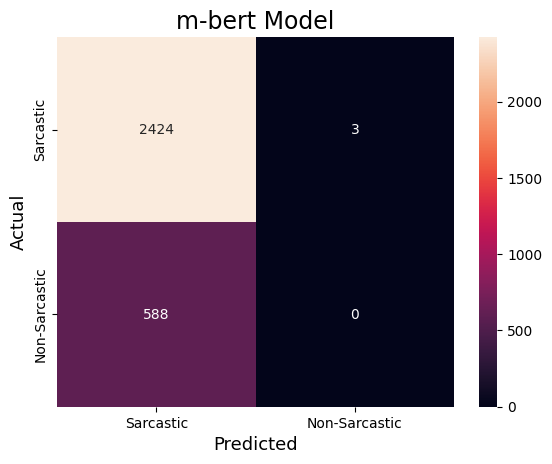

In [98]:
cm2=confusion_matrix(Y_test,y_pred_2)

print(cm2);
sns.heatmap(cm2,
            annot=True,
            fmt='g',
            xticklabels=['Sarcastic','Non-Sarcastic'],
            yticklabels=['Sarcastic','Non-Sarcastic'])
plt.ylabel('Actual',fontsize=13)
plt.xlabel('Predicted',fontsize=13)
plt.title('m-bert Model',fontsize=17)
plt.show()